In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


数据分析

In [2]:
import pandas as pd
train_sets = pd.read_csv("/kaggle/input/titanic/train.csv")
train_sets.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#查看数据的大致情况
train_sets.info()
# 总数为891，其中年龄，客舱号，港口信息缺失。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#查看具体数值情况
# 平均获救率是0.383838，年龄平均是29岁，多数分布在20-38之间（除去缺失值），2/3等舱的人多于1等舱的
train_sets.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


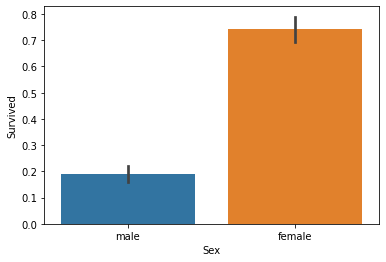

In [5]:
import seaborn as sns
sns.barplot(x="Sex",y="Survived",data=train_sets)
# 条形统计图结果表明 女性获救率大于男性


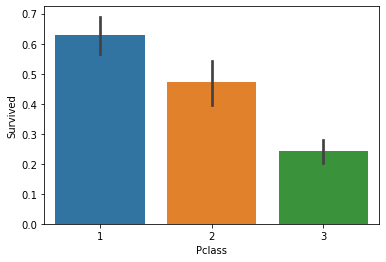

In [6]:
#舱位等级划分
sns.barplot(x="Pclass",y="Survived", data=train_sets)
# 舱位等级越高，获救率越高

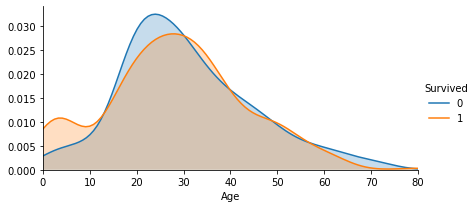

In [7]:
facet = sns.FacetGrid(train_sets, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_sets['Age'].max()))
facet.add_legend()
#分析得到获救率与年龄分布之间的关系

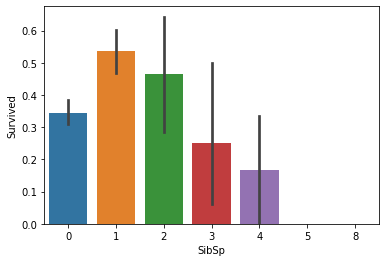

In [8]:
sns.barplot(x="SibSp",y="Survived",data=train_sets)
#获救率与兄弟姐妹的关系

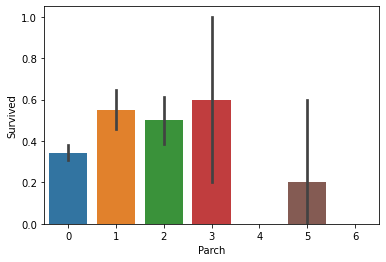

In [9]:
sns.barplot(x="Parch",y="Survived",data=train_sets)
#获救率与父母孩子之间的关系

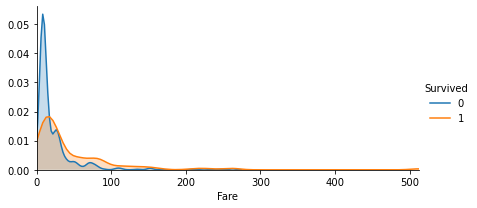

In [10]:
facet = sns.FacetGrid(train_sets, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_sets['Fare'].max()))
facet.add_legend()
#获救率与票价之间的关系

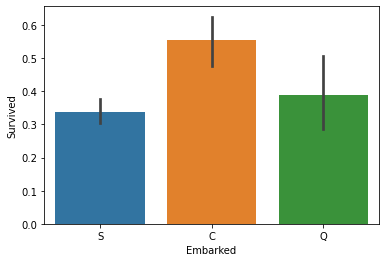

In [11]:
#港口与获救率
sns.barplot(x='Embarked',y='Survived',data=train_sets)

# 数据清洗 

In [12]:
#缺失值填充 对于年龄用平均值代替
#对于港口信息用众数代替
train_sets['Age'] = train_sets['Age'].fillna(train_sets['Age'].mean())
mode = train_sets['Embarked'].mode().values[0]
train_sets['Embarked'] = train_sets['Embarked'].fillna(mode)

# 数据编码

In [13]:
#对数据采用独热编码
features = ["Pclass", "Sex","Age", "SibSp", "Parch","Fare","Embarked"]
train_data = pd.get_dummies(train_sets[features])

# 划分训练集测试集

In [14]:
train_label = train_sets['Survived']
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =         train_test_split(train_data,train_label,test_size=0.2,random_state=666)

* train_data：被划分的样本特征集

* train_target：被划分的样本标签

* test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量

* random_state：是随机数的种子。

# 数据建模

In [15]:
#模型训练 二分类问题
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#使用KNN进行分类
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)
print(knn_clf.score(test_X,test_y)) #out:0.6983
#使用逻辑回归进行分类
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
print(log_reg.score(test_X,test_y)) #out:0.7821


0.6983240223463687
0.7821229050279329


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
#以上可以得到逻辑回归的准确率更高
#我们进行模型优化
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 为逻辑回归添加多项式项的管道
def PolynomialLogisticRegression(degree):    return Pipeline([        ('poly', PolynomialFeatures(degree=degree)),        ('std_scaler', StandardScaler()),        ('log_reg', LogisticRegression())    ])
# 使用管道得到对象
poly_log_reg = PolynomialLogisticRegression(degree=4)
poly_log_reg.fit(train_X, train_y)
print(poly_log_reg.score(test_X, test_y)) 
#out:0.8324

0.8324022346368715


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(poly_log_reg,train_X,train_y)
np.mean(scores) #0.8159
#交叉验证


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8159558751108047

In [18]:
#测试数据预测
test_sets=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data = test_sets[features]
test_data.info()
#缺失值处理(测试集缺失Age和Fare特征)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.info()
#独热编码
test_data_v2 = pd.get_dummies(test_data)
test_data_v2.head()
#输出预测文件
predictions = poly_log_reg.predict(test_data_v2)
output = pd.DataFrame({'PassengerId': test_sets.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_2.csv', index=False)
print("Your submission was successfully saved!")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3